# 第7章

## 挿入用のコード

## シンボリック計算

In [1]:
#---- ch07/import-sympy
import sympy as sp
sp.init_printing()

In [2]:
#---- ch07/define-alph-symbol
from sympy.abc import x, y, a, b, c, f

In [3]:
#---- ch07/use-alph-symbol
x ** 2 *  y / x

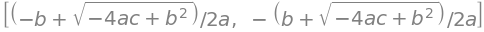

In [4]:
#---- ch07/solve-quadratic
sp.solve(a * x**2 + b * x + c, x)

In [5]:
#---- ch07/sympy-diff1
f = x**a * y**b
f.diff(x)

In [6]:
#---- ch07/sympy-diff2
f.diff(x).simplify()

In [7]:
#---- ch07/two-period-symbols
c, c_1, c_2, y1, y2 = sp.symbols("c, c_1, c_2, y_1, y_2")
r, rho, theta, s0 = sp.symbols("r rho theta s_0")

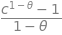

In [8]:
#---- ch07/utility
c, theta = sp.symbols("c theta")
u = (c**(1 - theta) - 1) / (1 - theta)
u

In [9]:
#---- ch07/crra
(- c * u.diff(c, 2) / u.diff(c)).simplify()

In [10]:
#---- ch07/solow-ss
k, s, delta, alpha, g, n = sp.symbols("k s delta alpha g n")
ss = sp.solve(s * k**alpha - (delta + g + n + g * n) * k, k)
ss

In [11]:
#---- ch07/solow-ss-subs
ss[0].subs({alpha: 0.3, s: 0.4, delta: 0.02, g: 0.03, n: 0.02})

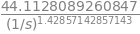

In [12]:
#---- ch07/solow-ss-subs2
ks = ss[0].subs({alpha: 0.3, delta: 0.02, g: 0.03, n: 0.02})
ks

In [13]:
#---- ch07/lambdify
f_ks = sp.lambdify(s, ks)
f_ks(0.3)

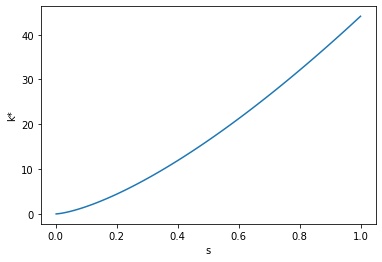

In [14]:
#---- ch07/lambdify-plot/plot
import numpy as np
import matplotlib.pyplot as plt

sgrid = np.linspace(0.001, 1, 100)
plt.plot(sgrid, f_ks(sgrid))
plt.xlabel("s")
plt.ylabel("k*")
plt.show()

### Example

In [15]:
#---- ch07/lagrangian
lamda = sp.symbols("lamda")
L = sp.sqrt(x * y) + lamda * (100 - x - 3 * y)
L
sp.solve([L.diff(x), L.diff(y), L.diff(lamda)])

In [16]:
#---- ch07/approximation1
fx = sp.sin(3 * x) + sp.exp(x / 2)
fx

In [17]:
#---- ch07/approximation2
fx_quad_withloop = (fx.subs({x: y}) 
                    + sum(fx.diff(x, i).subs({x: y}) * (x - y)**i / i 
                          for i in range(1, 3)))
fx_quad_withloop

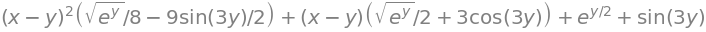

In [18]:
#---- ch07/approximation3
fx_quad = fx.series(x, y, n=3).removeO()
fx_quad

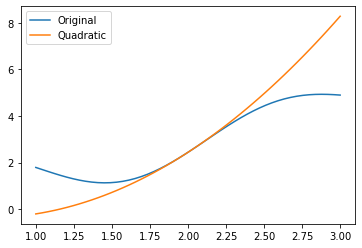

In [19]:
#---- ch07/approximation-plot/plot
fx_fun = sp.lambdify(x, fx)
fx_quad_fun = sp.lambdify(x, fx_quad.subs({y: 2}))

xgrid = np.linspace(1, 3)
plt.plot(xgrid, fx_fun(xgrid), label='Original')
plt.plot(xgrid, fx_quad_fun(xgrid), label='Quadratic')
plt.legend()
plt.show()

## 数値計算

In [33]:
#---- ch07/scipy.optimize
from scipy.optimize import newton, fsolve

In [34]:
#---- ch07/newton-single
def f(x):
    return x**2 - 3

def df(x):
    return 2 * x
    
newton(f, x0=3, fprime=df)

In [35]:
#---- ch07/newton-ndarray
newton(f, x0=np.array([-3, 3]), fprime=df)

array([-1.73205081,  1.73205081])

In [61]:
#---- ch07/fsolve
beta, r = 0.95, 0.05

def f(x):
    c1, c2, lam = x
    return [1 / c1 - lam,
            beta / c2 - lam / (1 + r),
            1000 - c1 - c2 / (1 + r)]

def df(x):
    c1, c2, lam = x
    return [[-1 / c1**2, 0,             -1],
            [0,          -beta / c2**2, -1 / (1 + r)],
            [-1,         -1 / (1 + r),  0]]

fsolve(f, x0=[100, 100, 0.1], fprime=df)

array([5.12820513e+02, 5.11538462e+02, 1.95000000e-03])

### シンボリック＋数値計算

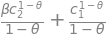

In [106]:
#---- ch07/full-workflow-utility
c1, c2, theta, r, beta, lamda = sp.symbols("c_1 c_2 theta r beta lamda")
U = c1**(1 - theta) / (1 - theta) + beta * c2**(1 - theta) / (1 - theta)
U

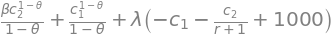

In [107]:
#---- ch07/full-workflow-lagrangian
L = U + lamda * (1000 - c1 - c2 / (1 + r))
L

In [108]:
#---- ch07/full-workflow-deriv1
f_sp = sp.Matrix([L.diff(v) for v in (c1, c2, lamda)])
f_sp

⎡          1 - θ   ⎤
⎢        c₁        ⎥
⎢   -λ + ───────   ⎥
⎢           c₁     ⎥
⎢                  ⎥
⎢    1 - θ         ⎥
⎢β⋅c₂          λ   ⎥
⎢───────── - ───── ⎥
⎢    c₂      r + 1 ⎥
⎢                  ⎥
⎢        c₂        ⎥
⎢-c₁ - ───── + 1000⎥
⎣      r + 1       ⎦

In [109]:
#---- ch07/full-workflow-deriv2
Df_sp = sp.Matrix(sp.BlockMatrix([f_sp.diff(v) for v in (c1, c2, lamda)]))
Df_sp

⎡  1 - θ             1 - θ                                      ⎤
⎢c₁     ⋅(1 - θ)   c₁                                           ⎥
⎢─────────────── - ───────                0                 -1  ⎥
⎢        2             2                                        ⎥
⎢      c₁            c₁                                         ⎥
⎢                                                               ⎥
⎢                               1 - θ               1 - θ       ⎥
⎢                           β⋅c₂     ⋅(1 - θ)   β⋅c₂        -1  ⎥
⎢            0              ───────────────── - ─────────  ─────⎥
⎢                                    2               2     r + 1⎥
⎢                                  c₂              c₂           ⎥
⎢                                                               ⎥
⎢                                        -1                     ⎥
⎢           -1                          ─────                0  ⎥
⎣                                       r + 1                   ⎦

In [122]:
#---- ch07/full-workflow-numeric
params = {beta: 0.90, theta: 0.3, r: 0.1}
f = sp.lambdify([(c1, c2, lamda)], np.squeeze(f_sp.subs(params)))
Df = sp.lambdify([(c1, c2, lamda)], Df_sp.subs(params))

In [124]:
#---- ch07/full-workflow-fsolve
c1_star, c2_star, lam_star = fsolve(f, x0=[500, 500, 1], fprime=Df)
c1_star, c2_star, lam_star

In [125]:
#---- ch07/full-workflow-change
(c2_star - c1_star) / c1_star

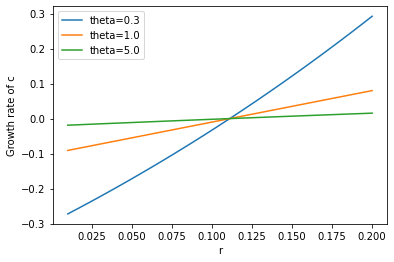

In [145]:
#---- ch07/full-workflow-loop/plot
N = 30
rv = np.linspace(0.01, 0.2, N)
theta_v = np.array([0.3, 1.0, 5])

for thta in theta_v:
    change = np.empty(N)
    for i in range(N):
        # Step 4
        params = {beta: 0.90, theta: thta, r: rv[i]}
        f = sp.lambdify([(c1, c2, lamda)], np.squeeze(f_sp.subs(params)))
        Df = sp.lambdify([(c1, c2, lamda)], Df_sp.subs(params))

        # Step 5
        c1_star, c2_star, lam_star = fsolve(f, x0=[500, 500, 1], fprime=Df)

        # Step 6
        change[i] = (c2_star - c1_star) / c1_star

    plt.plot(rv, change, label=f"theta={thta}")
    
plt.legend()
plt.xlabel("r")
plt.ylabel("Growth rate of c")
plt.show()

## 編集用コード